<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Flu_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load Data


In [3]:
df = pd.read_csv('/content/flu.csv')

# Tampilkan 5 data teratas
print("5 Data Teratas:")
display(df.head())

# Info umum
print("\nInformasi Dataset:")
df.info()

# Cek missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

# Deskripsi statistik
print("\nDeskripsi Statistik:")
display(df.describe())

5 Data Teratas:


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222


Cek Distribusi Kelas Target

In [8]:
 if 'flu' in df.columns:
    print("\nDistribusi Kelas Target:")
    sns.countplot(data=df, x='flu')
    plt.title("Distribusi Target 'flu'")
    plt.show()

Visualisasi Distribusi

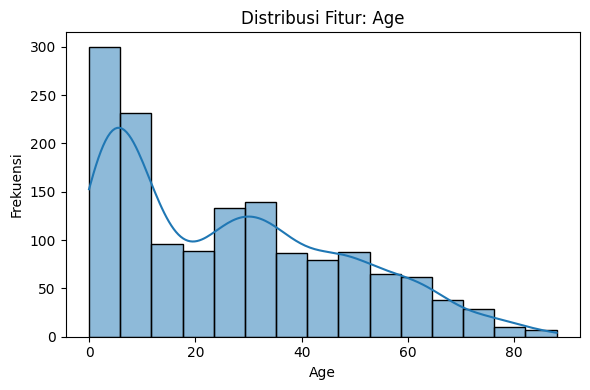

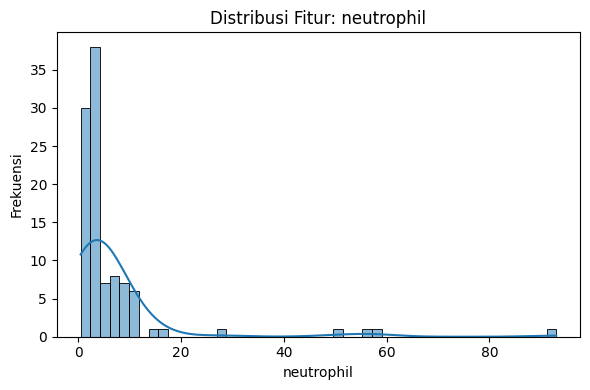

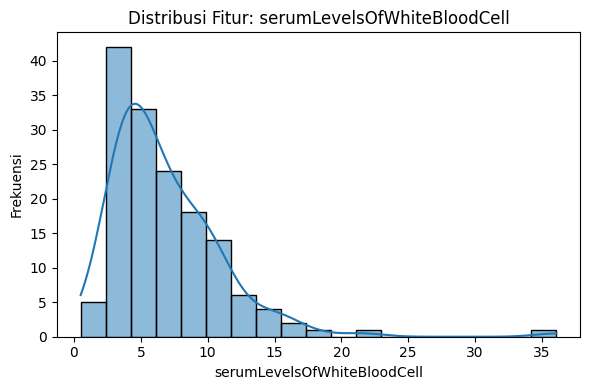

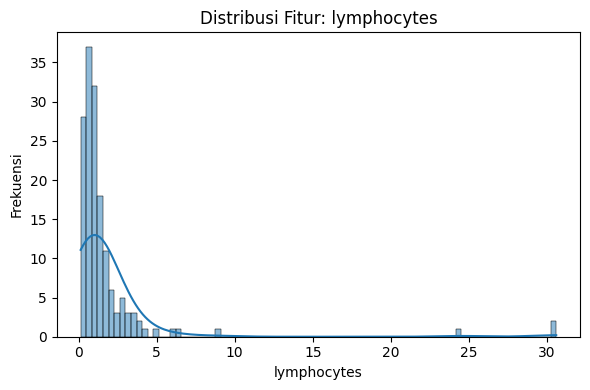

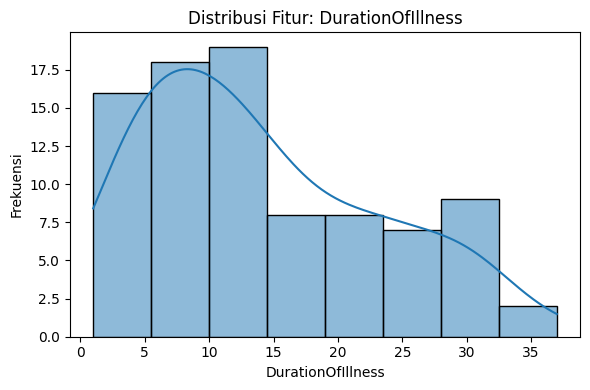

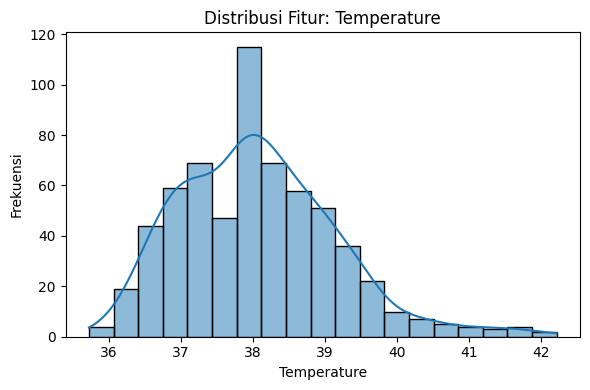

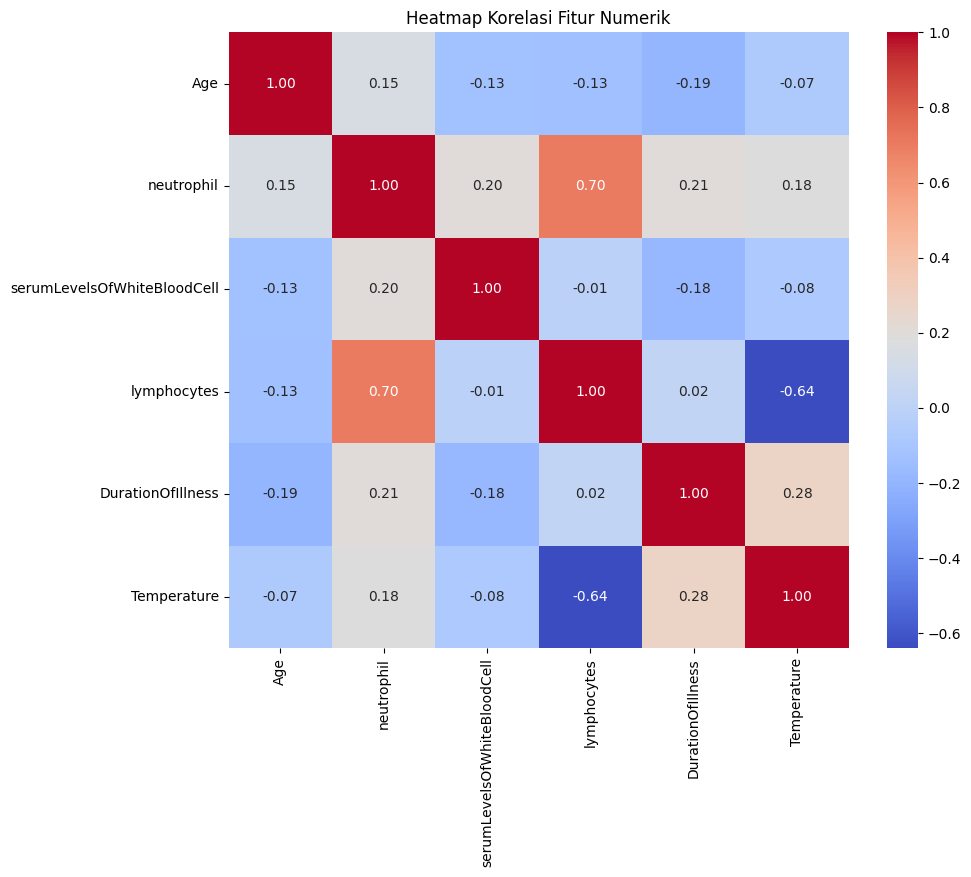

In [6]:
# Visualisasi distribusi setiap feature numerik
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Cek Fitur Kategorikal

In [7]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("\nFitur Kategorikal:", categorical_features)


Fitur Kategorikal: ['Diagnosis', 'InitialPCRDiagnosis', 'Sex', 'CReactiveProteinLevels', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']


Visualisasi Fitur Kategorikal

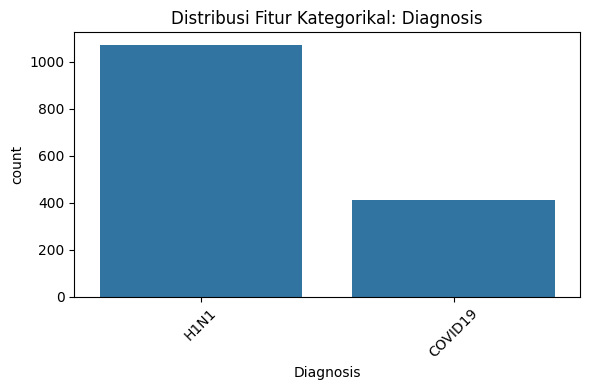

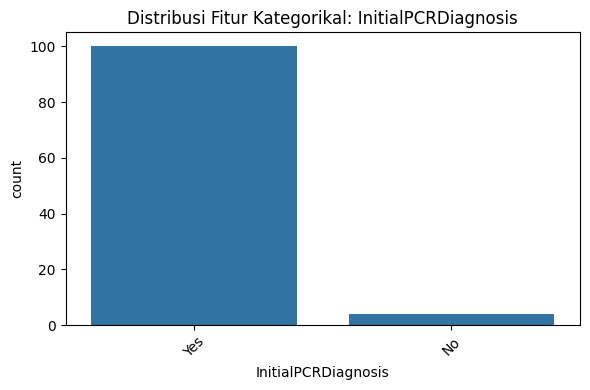

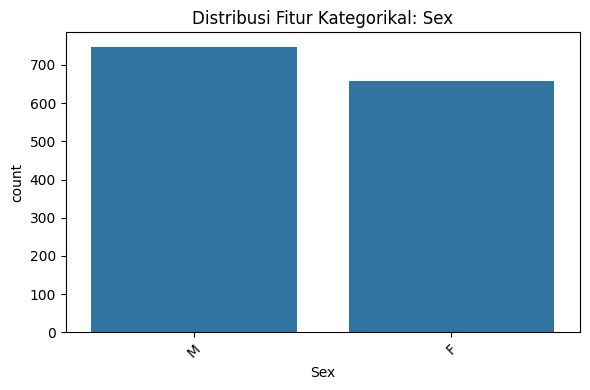

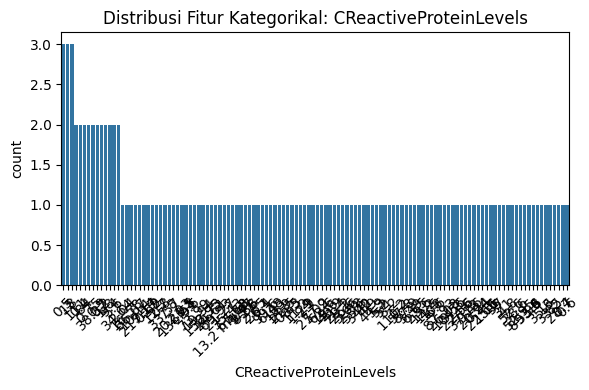

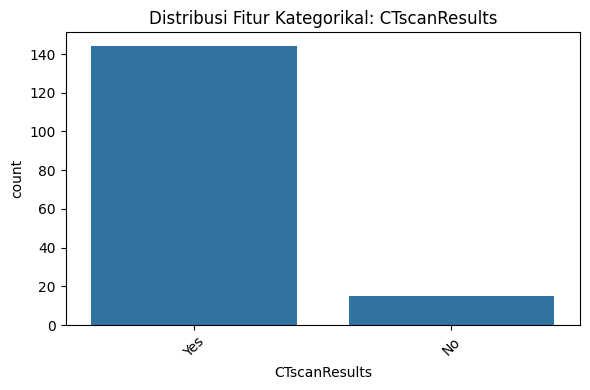

<ipython-input-9-b971c74d57d8>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


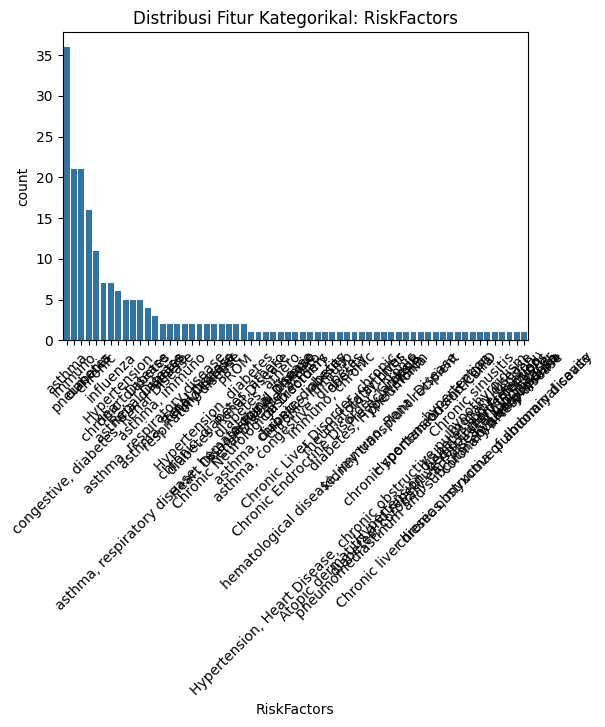

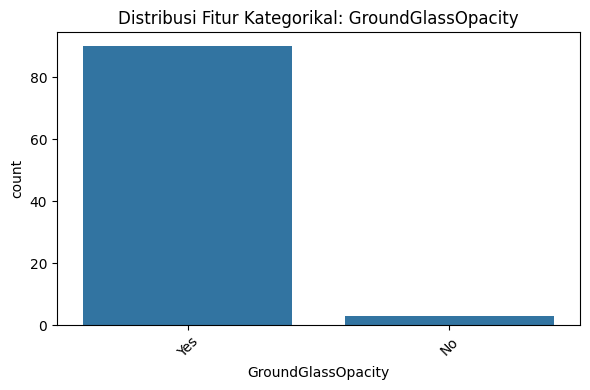

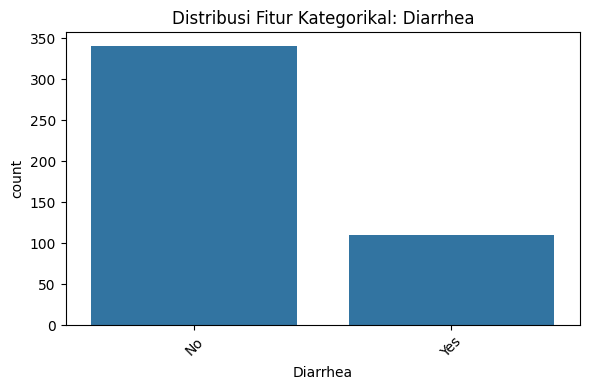

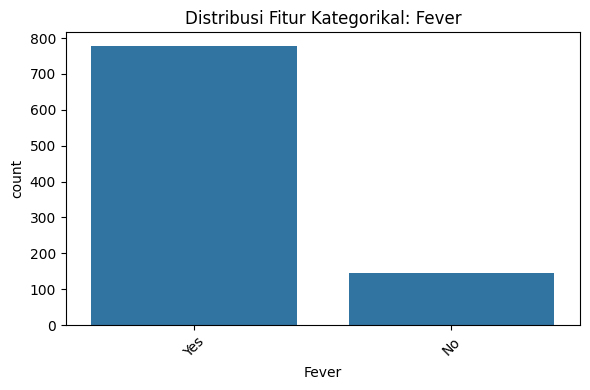

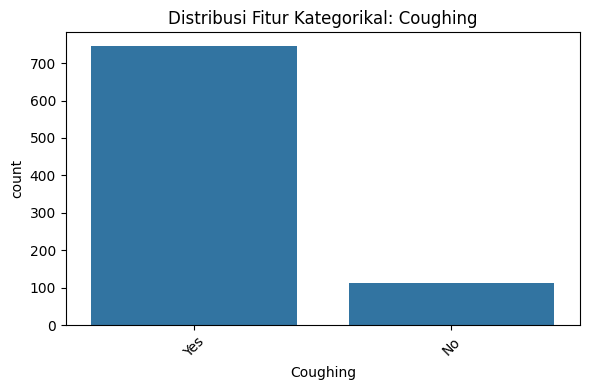

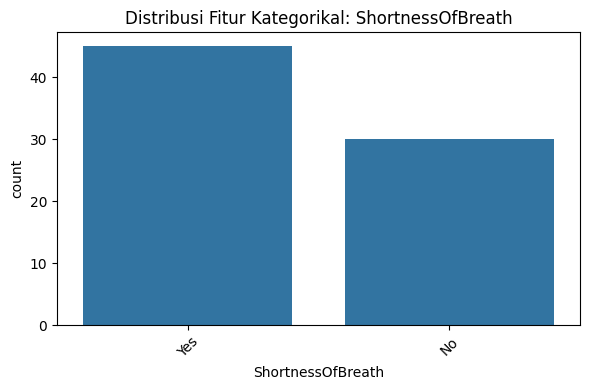

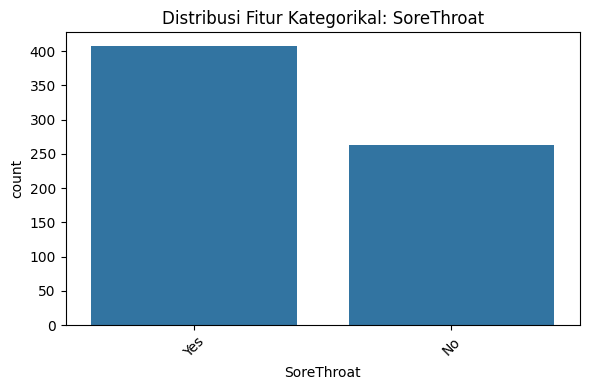

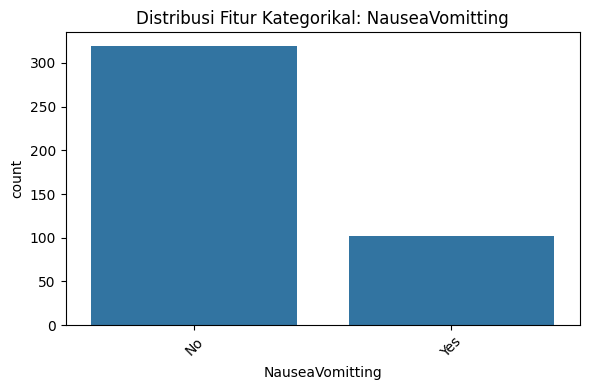

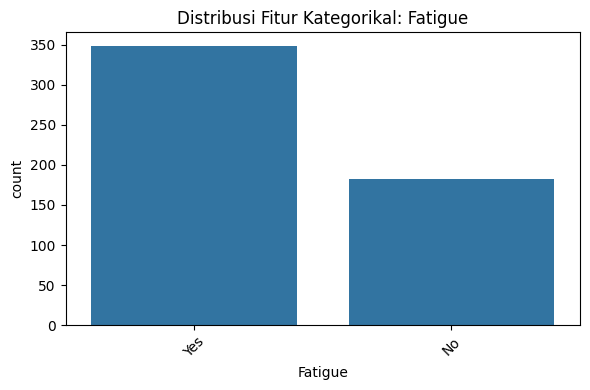

In [9]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi Fitur Kategorikal: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

One Hot Encoding


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nContoh Dataset Setelah Feature Engineering (One-Hot Encoding):")
display(df_encoded.head())


Contoh Dataset Setelah Feature Engineering (One-Hot Encoding):


,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature,Diagnosis_H1N1,InitialPCRDiagnosis_Yes,Sex_M,CReactiveProteinLevels_0.4,...,RiskFactors_respiratory disease,RiskFactors_rheumatoid arthritis,GroundGlassOpacity_Yes,Diarrhea_Yes,Fever_Yes,Coughing_Yes,ShortnessOfBreath_Yes,SoreThroat_Yes,NauseaVomitting_Yes,Fatigue_Yes
0,67.0,NaN,NaN,NaN,NaN,38.111111,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,29.0,NaN,NaN,NaN,NaN,NaN,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,22.0,NaN,NaN,NaN,NaN,NaN,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20.0,NaN,NaN,NaN,NaN,36.555556,True,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,21.0,NaN,NaN,NaN,NaN,NaN,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Evaluasi Model denga Target Diagnosis_H1N1

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# SET TARGET
target_column = 'Diagnosis_H1N1'  # Ganti jika target-nya ternyata beda

# Drop baris yang target-nya NaN (penting untuk supervised learning)
df_model = df_encoded.dropna(subset=[target_column])

# Pisahkan fitur dan target
X = df_model.drop(columns=[target_column])
y = df_model[target_column]

# IMPUTASI NaN pada fitur
imputer = SimpleImputer(strategy='mean')  # bisa juga 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# NORMALISASI
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# SPLIT TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MODEL
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# PREDIKSI
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Hasil Evaluasi

In [19]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.86      0.60      0.71        90
        True       0.85      0.96      0.90       207

    accuracy                           0.85       297
   macro avg       0.85      0.78      0.80       297
weighted avg       0.85      0.85      0.84       297

Akurasi  : 0.8485
Presisi  : 0.8462
Recall   : 0.9565
F1-Score : 0.8980
AUC      : 0.9255


ROC Curve

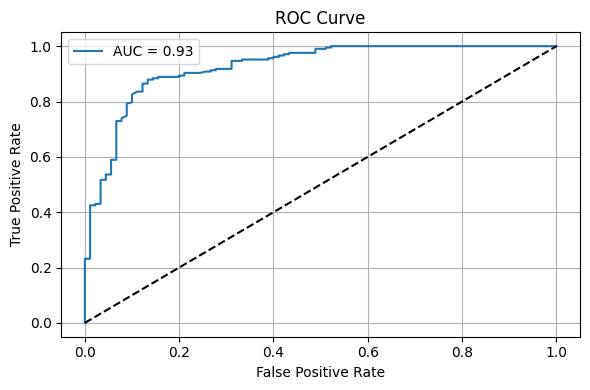

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Persamaan Matematika
##1. Akurasi
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan semua prediksi yang dilakukan.

Rumus Matematis:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:
- $TP (True Positive)$ = Kasus positif yang diprediksi positif
- $TF (True Negative)$ = Kasus negatif yang diprediksi negatif
- $FP (False Positive)$ = Kasus negatif yang salah diprediksi sebagai positif
- $FF (False Negative)$ = Kasus positif yang salah diprediksi sebagai negatif<br><br>

##2. Presisi
Presisi menunjukkan dari seluruh prediksi positif, berapa banyak yang benar-benar positif. Ini penting jika kesalahan positif (false positive) harus dikurangi (misal pada diagnosa flu). Semakin tinggi nilai precision, semakin sedikit false positive.

Rumus Matematis:

$$
Presisi = \frac{TP}{TP + FP}
$$<br><br>


##3. Recall (Sensitivity / True Positive Rate)
Recall mengukur dari semua kasus yang seharusnya positif, berapa banyak yang berhasil dikenali oleh model. Recall tinggi artinya model tidak melewatkan banyak kasus flu yang benar-benar ada. Penting jika False Negative berbahaya (misal: tidak mendeteksi penyakit).

Rumus Matematis:

$$
Recall = \frac{TP}{TP + FN}
$$<br><br>

##4. F1-Score
F1-Score adalah harmonic mean dari Precision dan Recall. Berguna jika kita butuh keseimbangan antara Precision dan Recall. F1-Score memberikan nilai rendah jika salah satu dari Precision atau Recall rendah. Cocok saat ada ketidakseimbangan antara jumlah kelas positif dan negatif (misalnya lebih banyak pasien sehat dibandingkan yang sakit).

$$
F1-Score = 2 \times \frac{Precision×Recall}{Precision+Recall}
$$<br><br>

##5. AUC - ROC (Area Under Curve - Receiver Operating Characteristic)
AUC adalah luas di bawah kurva ROC. ROC adalah plot antara True Positive Rate (Recall) dan False Positive Rate (FPR). AUC digunakan untuk melihat performa model di berbagai ambang threshold probabilitas. Rumus untuk AUC tidak dituliskan eksplisit dalam satu persamaan*, tapi kita bisa tulis komponen ROC-nya.

Rumus Matematis:

$$
TPR(Recall) = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

Di mana:
- $AUC$ = 1 berarti modelnya sempurna
- $AUC$ = 0.5 berarti model tidak lebih baik dari tebakan acak.